In [ ]:
import numpy as np
import matplotlib.pyplot as plt

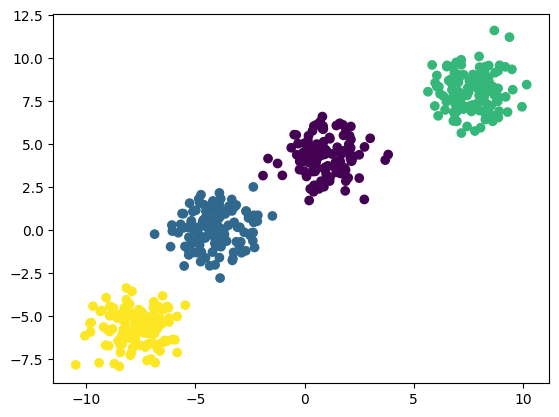

In [ ]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1,random_state=3)
plt.scatter(x[:,0],x[:,1],c=y)

In [ ]:
def Kmeans(n_cluster,x):
  centroids=np.random.random((n_cluster,x.shape[1]))
  for _ in range(100):
    labels=labeling(centroids,x)
    centroids=new_centroid(labels,x,n_cluster)
  return labels,centroids


In [ ]:
def labeling(centroids,x):
  labels=np.zeros(x.shape[0])
  for i,point in enumerate(x):
    labels[i]=np.argmin(np.sum((centroids-point)**2,axis=1))
  return labels



In [ ]:
def new_centroid(labels,x,n_cluster):
  new_centroids=np.zeros((n_cluster,x.shape[1]))
  for i in range(n_cluster):
    near_points=x[labels==i]
    if(len(near_points)!=0):
      new_centroids[i]=np.mean(near_points,axis=0)
    else:
      new_centroids[i]=np.random.random(x.shape[1])
  return new_centroids

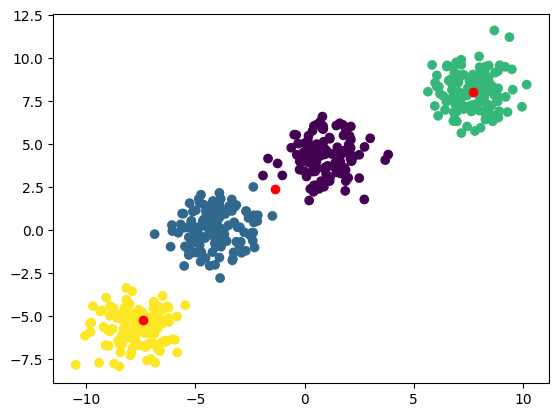

In [ ]:
labels,new_centroids=Kmeans(3,x)
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(new_centroids[:,0],new_centroids[:,1],c="red")

In [ ]:
wss=[]
for i in range(1,9):
  l,c=Kmeans(i,x)
  dis=0
  for j in range(i):
    near_points=x[l==j]
    dis+=np.sum((c[j]-near_points)**2)
  wss.append(dis)
wss


[np.float64(30831.05439899151),
 np.float64(7716.128949200447),
 np.float64(3596.5901676696426),
 np.float64(1008.471547931161),
 np.float64(905.1721299346203),
 np.float64(852.974591391767),
 np.float64(765.1552305308708),
 np.float64(689.2988237644988)]

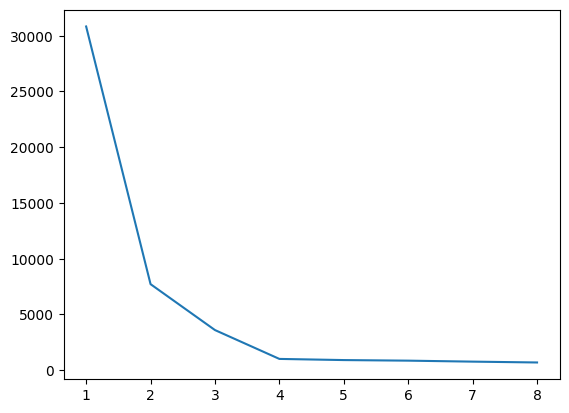

In [ ]:
plt.plot(range(1,9),wss)